In [2]:
from sklearn import tree
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns

In [3]:
data = pd.read_csv('solarenergy.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Visibility       

In [4]:
data.head()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Day of Year,2920.0,183.334247,105.769919,1.000000,92.000000,183.000000,275.000000,366.000000
Year,2920.0,2008.665753,0.471807,2008.000000,2008.000000,2009.000000,2009.000000,2009.000000
Month,2920.0,6.526027,3.448442,1.000000,4.000000,7.000000,10.000000,12.000000
Day,2920.0,15.720548,8.797754,1.000000,8.000000,16.000000,23.000000,31.000000
First Hour of Period,2920.0,11.500000,6.875041,1.000000,6.250000,11.500000,16.750000,22.000000
Distance to Solar Noon,2920.0,0.503294,0.298024,0.050401,0.243714,0.478957,0.739528,1.141361
Average Temperature (Day),2920.0,58.468493,6.841200,42.000000,53.000000,59.000000,63.000000,78.000000
Average Wind Direction (Day),2920.0,24.953425,6.915178,1.000000,25.000000,27.000000,29.000000,36.000000
Average Wind Speed (Day),2920.0,10.096986,4.838185,1.100000,6.600000,10.000000,13.100000,26.600000
Sky Cover,2920.0,1.987671,1.411978,0.000000,1.000000,2.000000,3.000000,4.000000


In [6]:
data = data.dropna(axis=0)

array([<AxesSubplot:ylabel='Power Generated'>], dtype=object)

<Figure size 1600x600 with 0 Axes>

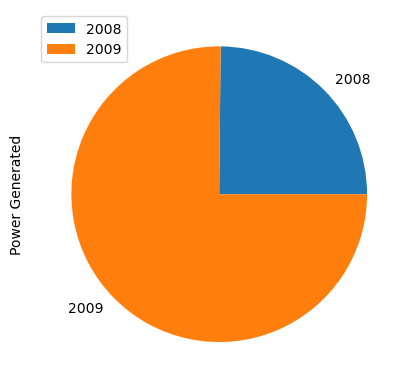

In [7]:
subdata = data.groupby('Year').sum()['Power Generated']
subdata=subdata.to_frame()
plt.figure(figsize=(16,6))
subdata.plot(kind='pie',legend = True, subplots=True)

the power has producted in 2009 is too biger than taht producted in 2008 with ration 302.44 %

<AxesSubplot:title={'center':'the 5 five avg temerature has a the big power generated '}, ylabel='Average Temperature (Day)'>

<Figure size 1600x600 with 0 Axes>

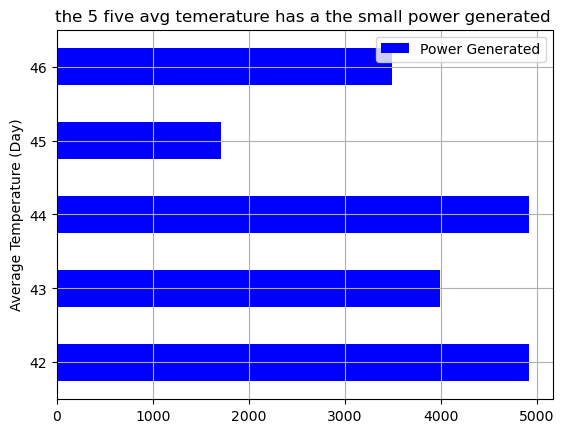

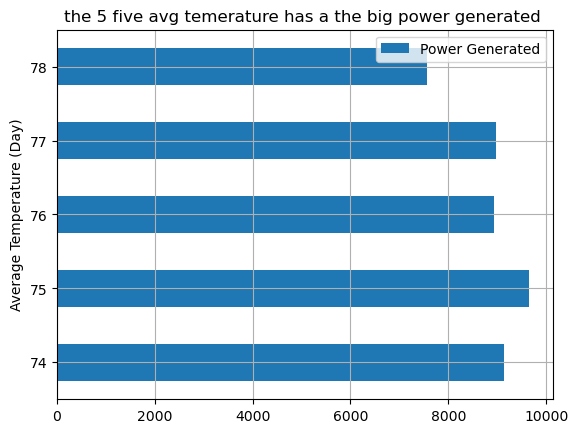

In [8]:
plt.figure(figsize=(16,6))
subdata=data[["Average Temperature (Day)","Power Generated"]].groupby("Average Temperature (Day)").mean()
subdata.head(5).plot(kind="barh",grid=True,title = "the 5 five avg temerature has a the small power generated ",stacked=True,color=['b', 'r', 'g', 'y', 'k'])
subdata.tail(5).plot(kind="barh",grid=True,title = "the 5 five avg temerature has a the big power generated ",stacked=True)

<AxesSubplot:xlabel='Average Temperature (Day)'>

<Figure size 1600x600 with 0 Axes>

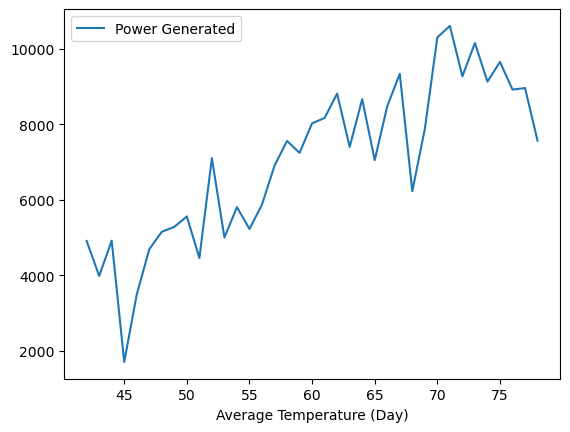

In [9]:
plt.figure(figsize=(16,6))
subdata.plot()

<AxesSubplot:title={'center':'the 5 five Relative Humidity value has a the small power generated '}, ylabel='Relative Humidity'>

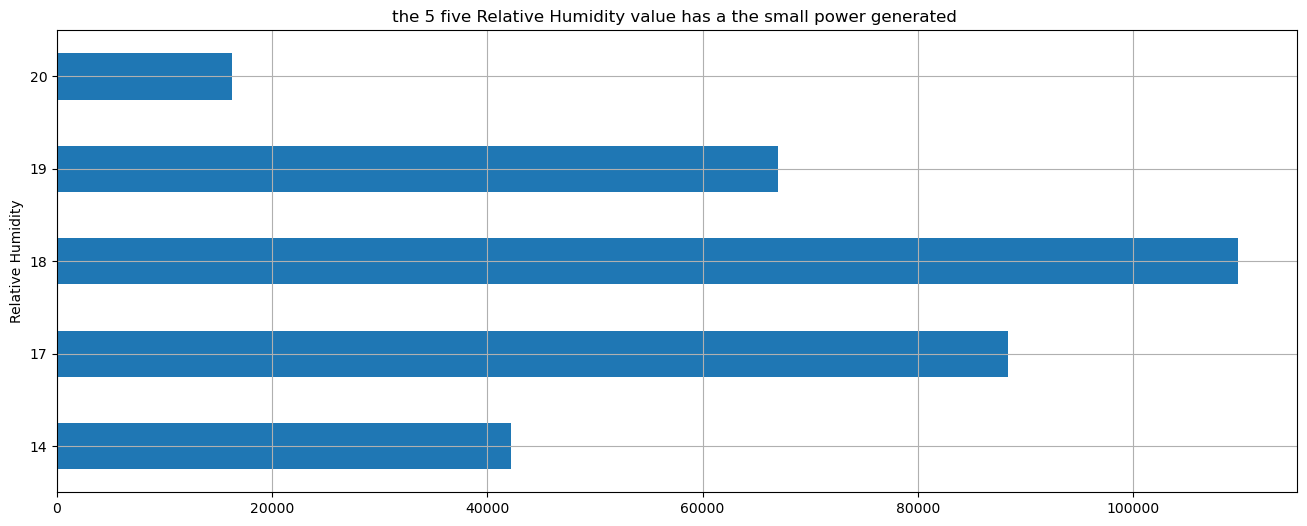

In [10]:
plt.figure(figsize=(16,6))
subdata = data.groupby("Relative Humidity")["Power Generated"].sum()
subdata.tail(5).plot(kind="barh",grid=True,title = "the 5 five Relative Humidity value has a the big power generated ",stacked=True)
subdata.head(5).plot(kind="barh",grid=True,title = "the 5 five Relative Humidity value has a the small power generated ",stacked=True)

<AxesSubplot:xlabel='Relative Humidity'>

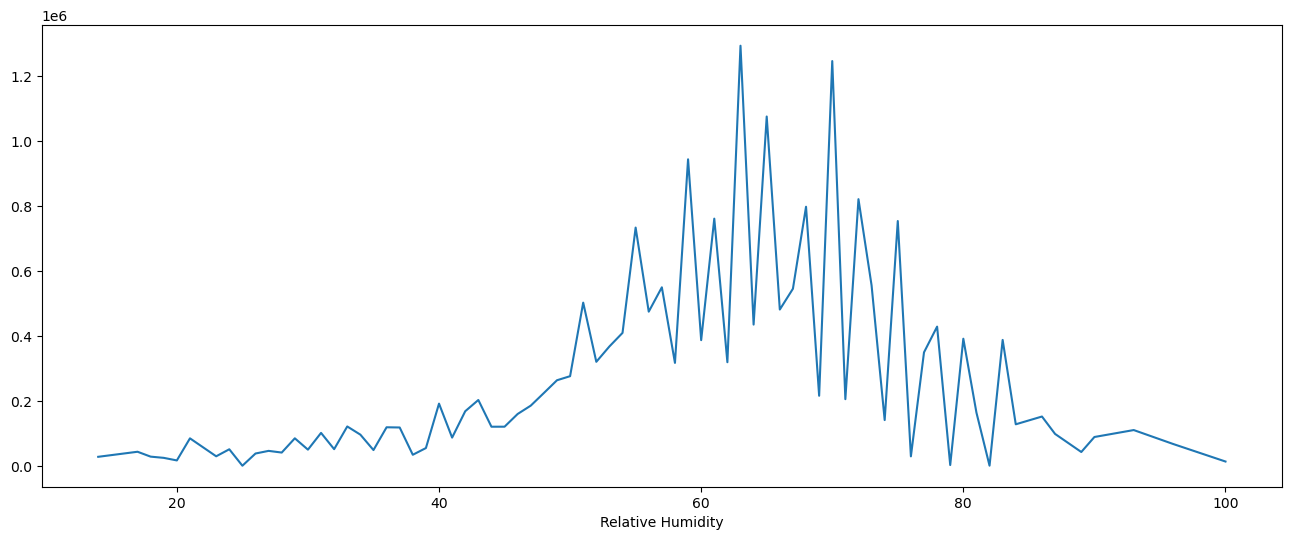

In [11]:
plt.figure(figsize=(16,6))
subdata.plot()

power generated depend of the relative humidity

<AxesSubplot:title={'center':'the 5 five wind speed value has a the small power generated '}, ylabel='Average Wind Speed (Period)'>

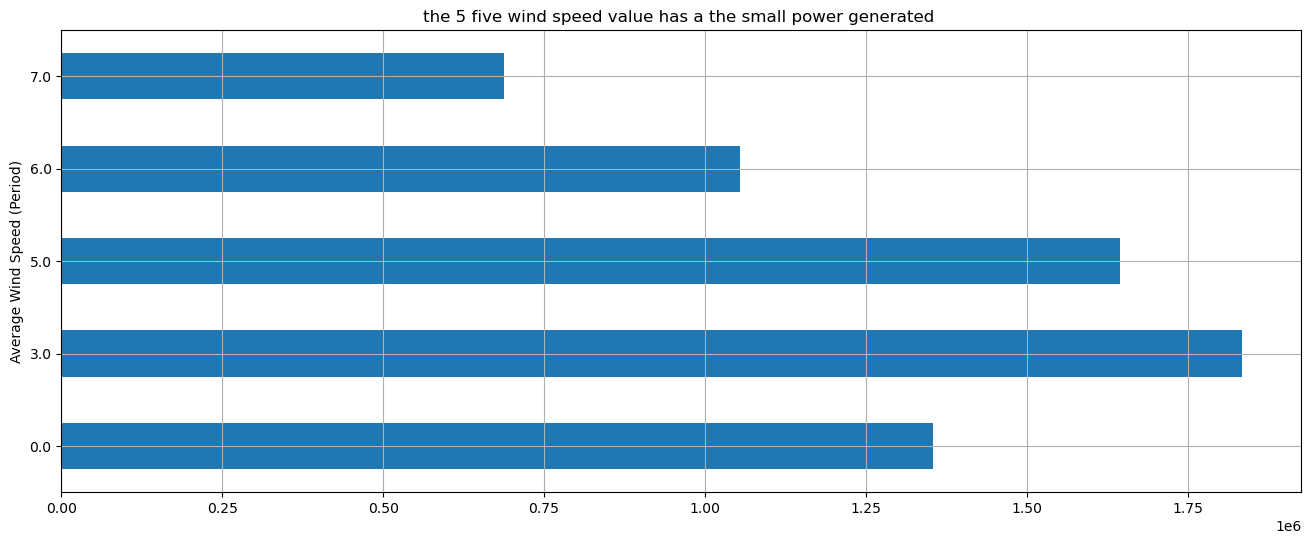

In [12]:
plt.figure(figsize=(16,6))
subdata = data.groupby("Average Wind Speed (Period)")["Power Generated"].sum()
subdata.tail(5).plot(kind="barh",grid=True,title = "the 5 five wind speed value has a the big power generated ",stacked=True)
subdata.head(5).plot(kind="barh",grid=True,title = "the 5 five wind speed value has a the small power generated ",stacked=True)

<AxesSubplot:xlabel='Average Wind Speed (Period)'>

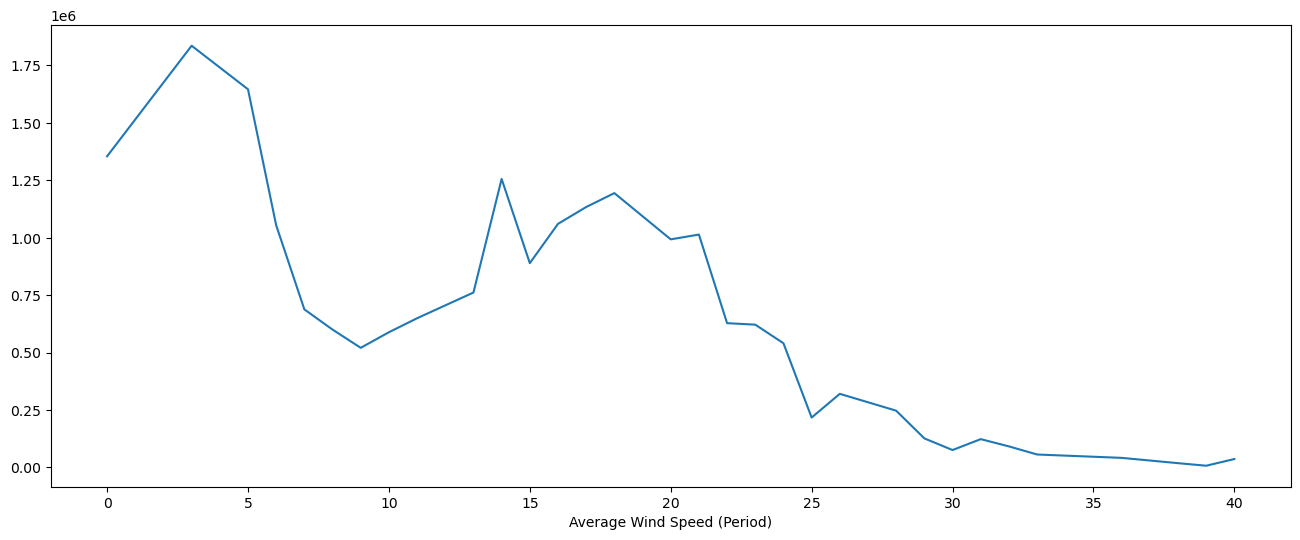

In [13]:
plt.figure(figsize=(16,6))
subdata.plot()

more the wind is slow more the power generated is more big

<Figure size 1600x600 with 0 Axes>

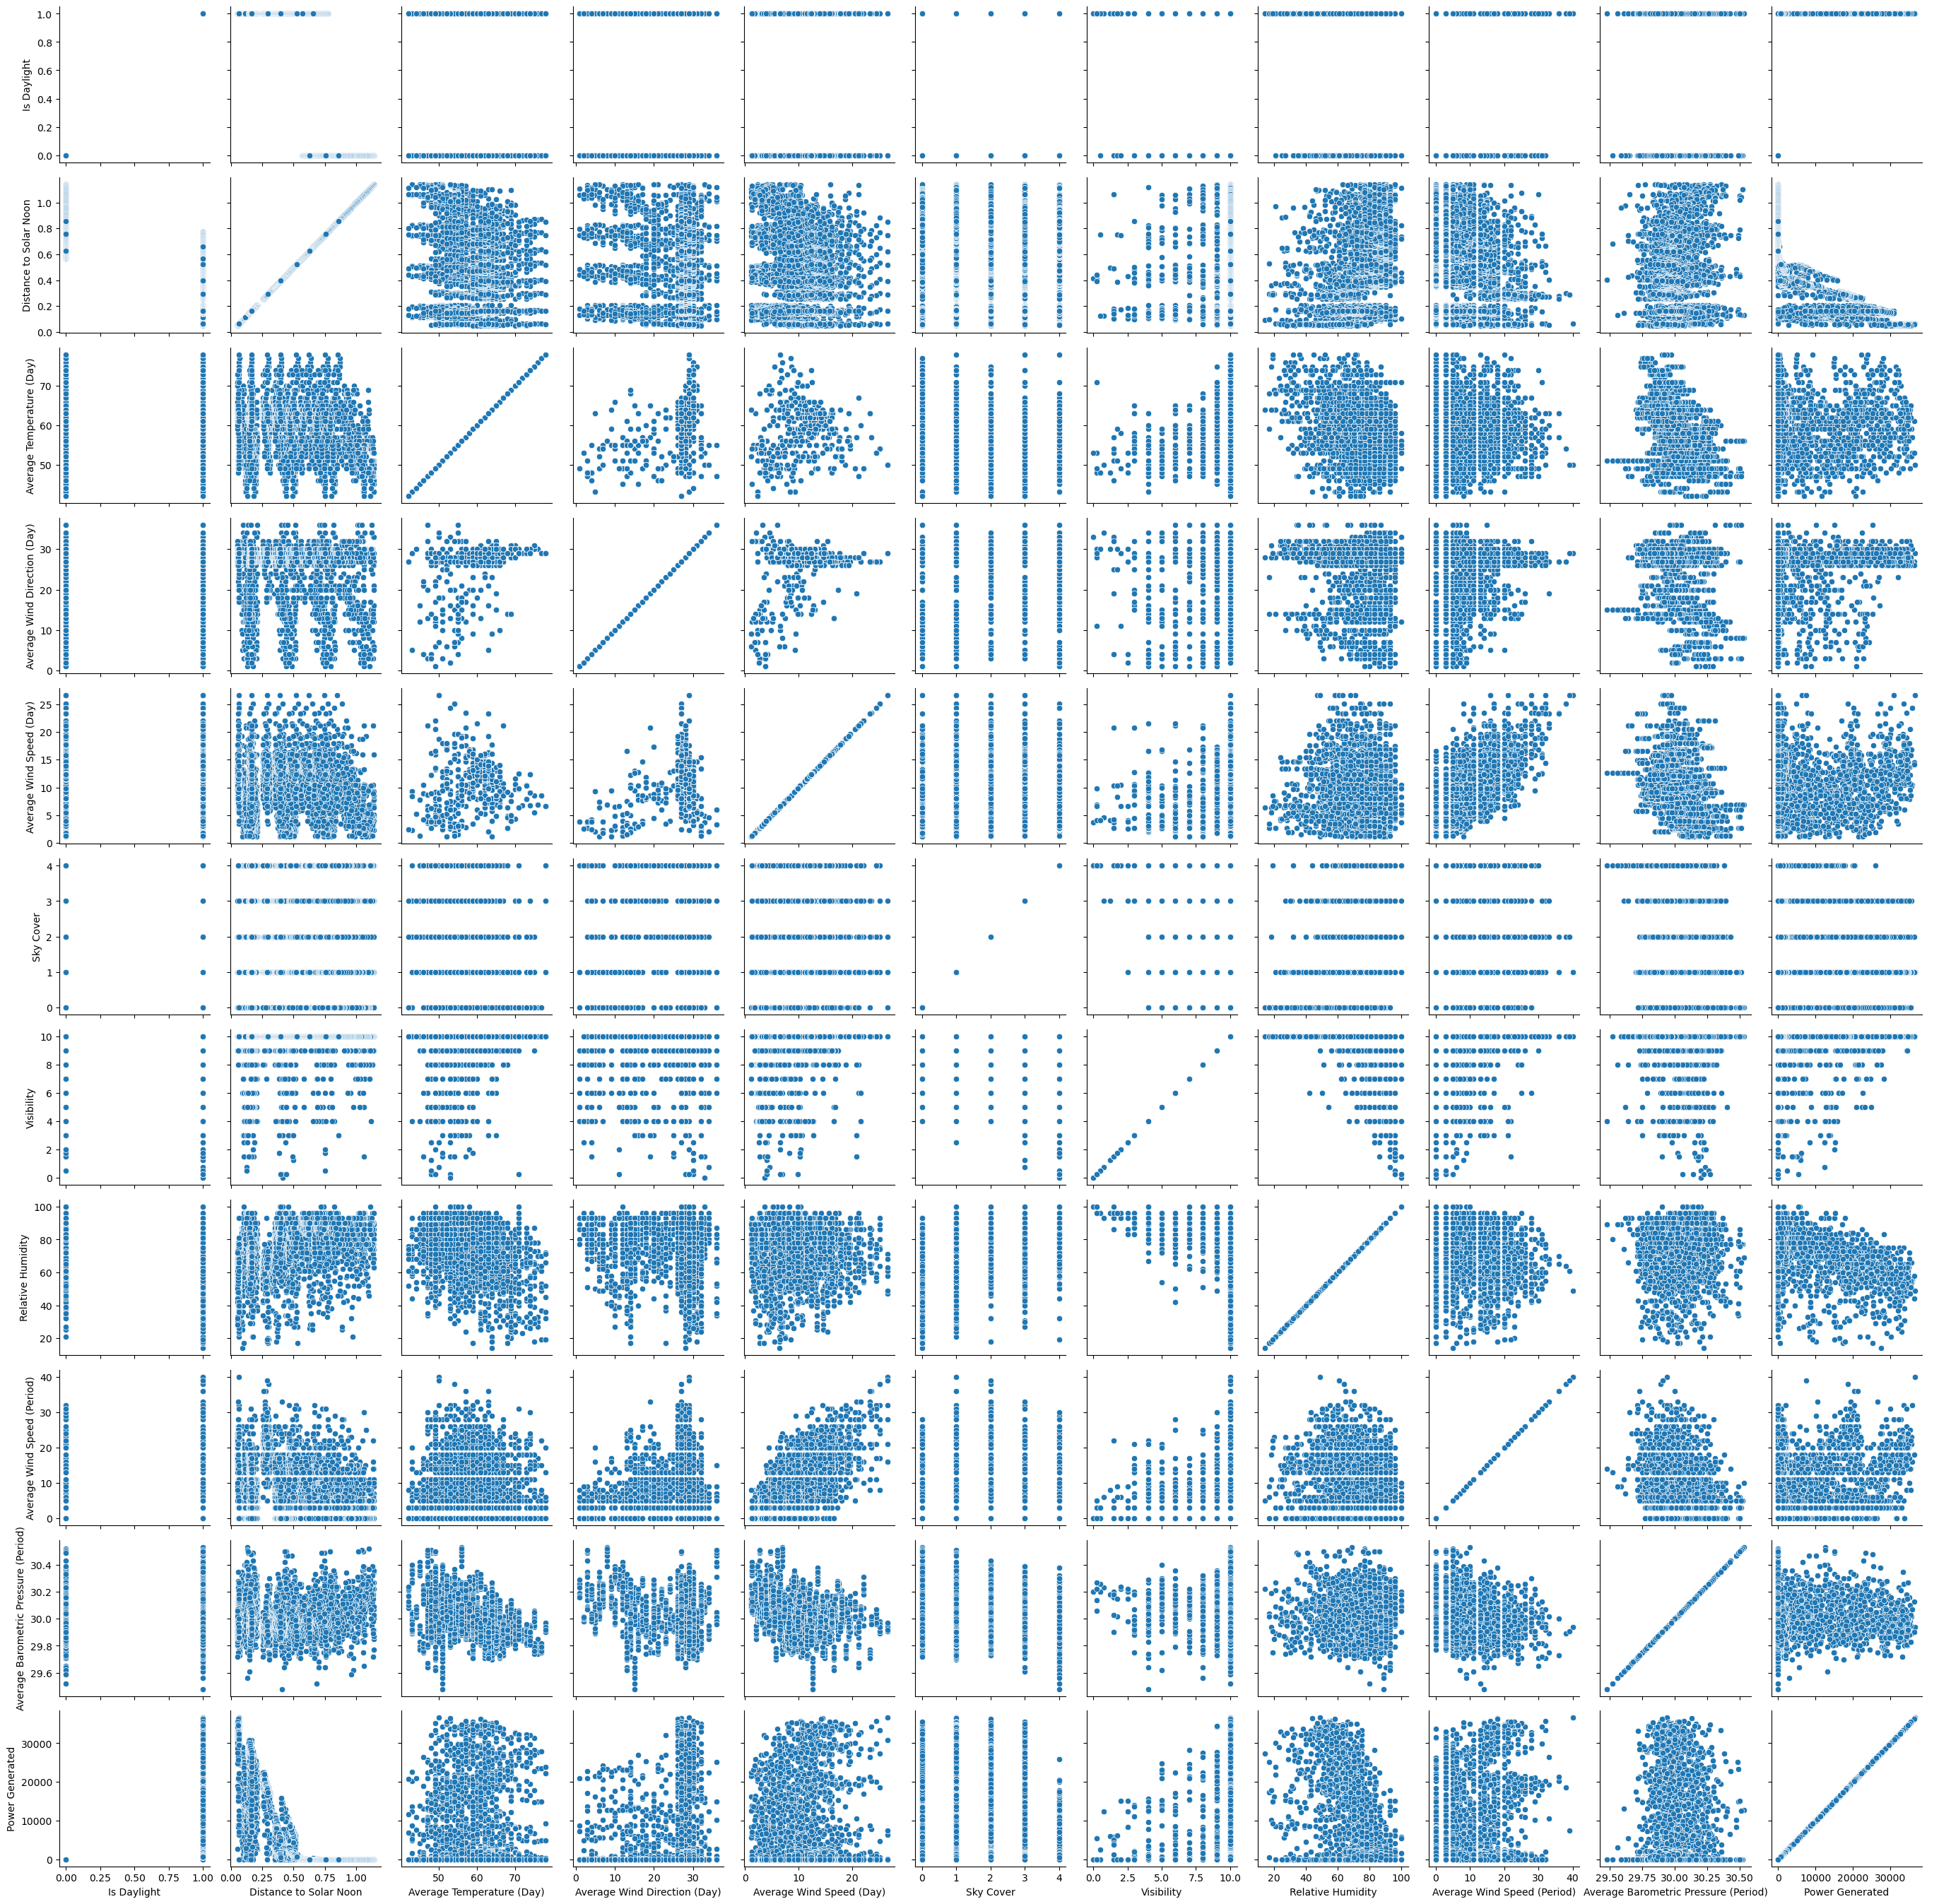

In [14]:
sub_data = data[['Is Daylight', 'Distance to Solar Noon', 'Average Temperature (Day)', 'Average Wind Direction (Day)', 'Average Wind Speed (Day)', 'Sky Cover','Visibility', 'Relative Humidity', 'Average Wind Speed (Period)','Average Barometric Pressure (Period)', 'Power Generated']]
plt.figure(figsize=(16,6))
g = sns.PairGrid(sub_data)
g.map(sns.scatterplot)
g.add_legend()